In [502]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import Lasso, LassoCV, Ridge, ElasticNetCV, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, Imputer,RobustScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.neural_network import MLPRegressor ,MLPClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.image as mpimg

In [422]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

def rank_features_with_header(X_train,y_train):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=1)
    selector = rfe.fit(X_train,y_train)
    rank = selector.ranking_
    
    headers = list(X_train.head(0))

    l = [i for i in range(1,len(headers)+1)]
    a = np.array(l)

    feature_sequence = []
    for i in a:
        index = np.where(rank==i)
        k = list(index)
        position = int(k[0])
        feature_sequence.append(headers[position])

    return feature_sequence

In [423]:
data = pd.read_csv("kidney_disease.csv")

In [424]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [425]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [426]:
data.isnull().values.any()

True

In [427]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio
rbc,38.00
rc,32.75
wc,26.50
pot,22.00
sod,21.75


In [428]:
data["age"] = data["age"].fillna(data["age"].mean())

In [429]:
data["bp"] = data["bp"].fillna(data["bp"].mean())

In [430]:
data["sg"] = data["sg"].fillna(data["sg"].mean())

In [431]:
for index, row in data[["al"]].iterrows():
    if index < 250:
        data["al"] = data["al"].fillna(data["al"].mean())
    else:
        data["al"] = data["al"].fillna(0)

In [432]:
data["su"] = data["su"].fillna(int(data["su"].mode()[0]))

In [433]:
data["rbc"] = data["rbc"].fillna(data["rbc"].mode()[0])

In [434]:
data["pc"] = data["pc"].fillna(data["pc"].mode()[0])

In [435]:
data["pcc"] = data["pcc"].fillna(data["pcc"].mode()[0])

In [436]:
data["ba"] = data["ba"].fillna(data["ba"].mode()[0])

In [437]:
data["bgr"] = data["bgr"].fillna(data["bgr"].mean())

In [438]:
data["bu"] = data["bu"].fillna(data["bu"].mean())

In [439]:
for index, row in data[["sc"]].iterrows():
    if index < 250:
        data["sc"] = data["sc"].fillna(data["sc"].head(250).mean())
    else:
        data["sc"] = data["sc"].fillna(data["sc"].tail(150).mean())

In [440]:
data["sod"] = data["sod"].fillna(data["sod"].mean())

In [441]:
data["pot"] = data["pot"].fillna(data["pot"].mean())

In [442]:
data["hemo"] = data["hemo"].fillna(data["hemo"].mean())

In [443]:
data["pcv"] = data["pcv"].fillna(data["pcv"].mean())

In [444]:
data["wc"] = data["wc"].fillna(data["wc"].mean())

In [445]:
data["rc"] = data["rc"].fillna(data["rc"].mean())

In [446]:
for index, row in data[["htn"]].iterrows():
    if index < 250:
        data["htn"] = data["htn"].fillna("yes")
    else:
        data["htn"] = data["htn"].fillna("no")

In [447]:
data["dm"] = data["dm"].replace("\tno","no")
data["dm"] = data["dm"].replace("\tyes","yes")
data["dm"] = data["dm"].replace(" yes","yes")

In [448]:
for index, row in data[["dm"]].iterrows():
    if index < 250:
        data["dm"] = data["dm"].fillna("yes")
    else:
        data["dm"] = data["dm"].fillna("no")

In [449]:
data["cad"] = data["cad"].replace("\tno","no")

In [450]:
data["cad"] = data["cad"].fillna(data["cad"].mode()[0])

In [451]:
data["appet"] = data["appet"].fillna(data["appet"].mode()[0])

In [452]:
data["pe"] = data["pe"].fillna(data["pe"].mode()[0])

In [453]:
data["ane"] = data["ane"].fillna(data["ane"].mode()[0])

In [454]:
data.isnull().values.any()

False

In [455]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [456]:
data["classification"] = data["classification"].replace("ckd\t","ckd")

In [457]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [458]:
cols = ('rbc', 'pc', 'pcc', 'ba', 'htn','dm', 'cad','appet', 'pe', 'ane','classification')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (400, 26)


In [459]:
data.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,8406.122449,4.707435,0.372500,0.347500,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,2523.219976,0.840314,0.484076,0.476773,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [460]:
Y = data.classification.values

In [461]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [462]:
drop_list = ["id","classification"]
data.drop(drop_list, axis=1, inplace=True)

In [463]:
ranked_feature = rank_features_with_header(data,Y)

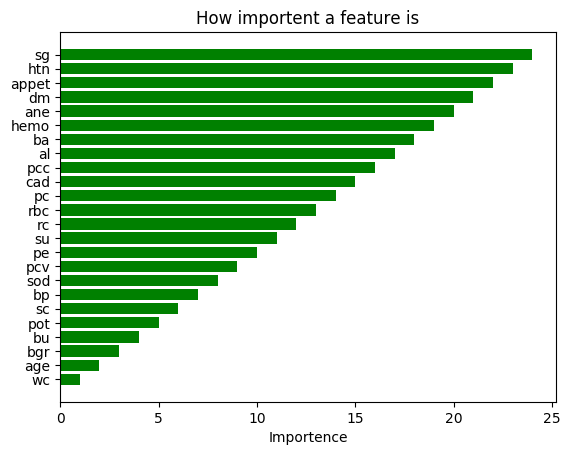

In [464]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ranked_feature
y_pos = np.arange(len(people))
performance = [i for i in range(24,0,-1)] 
error = np.random.rand(len(people))

ax.barh(y_pos, performance, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importence')
ax.set_title('How importent a feature is')

plt.show()

In [492]:
def clf_under_feature_importence(ranked_feature,X_train,X_test,y_train,clf):
    feature_list = []
    best_score = 0
    best_features = []
    for i in range(len(ranked_feature)):
        feature_list.append(ranked_feature[i])
        X_selected_train = X_train[feature_list]
        X_selected_test = X_test[feature_list]

        clf.fit(X_selected_train,y_train)
        y_predict = clf.predict(X_selected_test)
        
        accuracy = accuracy_score(y_test,y_predict)
        F1_score = f1_score(y_test,y_predict)
        
        if F1_score >= best_score:
            best_score = F1_score
            best_features = feature_list
            
    return best_score,best_features

In [493]:
def cross_val_score_calculation(clf,X,y):
    clf.fit(X, y)
    accuracys = cross_val_score(clf, X,y,cv = 10)
    print(accuracys)
    print(np.average(accuracys))
    return np.average(accuracys)

In [494]:
X_train,X_test,y_train,y_test = train_test_split(data,Y,train_size=0.8,stratify=Y)

In [495]:
regrf_corelation = RandomForestClassifier()
regrf_corelation_cv_score = cross_val_score_calculation(regrf_corelation,data, Y)

[ 1.     0.975  0.975  0.975  0.925  0.975  0.975  1.     1.     1.   ]
0.98


In [497]:
best_score,best_features = clf_under_feature_importence(ranked_feature,X_train,X_test,y_train,regrf_corelation)

In [498]:
new_data = data[best_features]

In [501]:
regrf_corelation = RandomForestClassifier()
regrf_corelation_cv_score = cross_val_score_calculation(regrf_corelation,new_data, Y)

[ 0.975  0.975  1.     1.     0.925  1.     0.975  1.     1.     1.   ]
0.985


In [504]:
# normalizing the data 
def normalize_data(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    print(X_scaled.shape)
    return X_scaled

In [505]:
new_data_scaled = normalize_data(new_data)

(400, 24)


In [506]:
mlp_clf = MLPClassifier()
mlp_clf_corelation_cv_score = cross_val_score_calculation(mlp_clf,new_data_scaled, Y)

[ 1.     1.     1.     0.975  0.975  1.     0.975  1.     1.     1.   ]
0.9925
